# SVDによる次元削減の例
- 全体の流れ
  - [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)を準備。
  - SVDで特異値分解し、3次元に圧縮。
  - 比較対象としてPCAで第3主成分まで使うものを用意。
  - LogisticRegressionで分類学習。学習・テスト用のデータセット分割は省略。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import decomposition


## データセット準備

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(X[0])
print(len(y))
print(y)

(150, 4)
[5.1 3.5 1.4 0.2]
150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## SVDによる特異値分解

In [3]:
U, s, Vt = np.linalg.svd(X)
print(U.shape, s.shape, Vt.shape)

(150, 150) (4,) (4, 4)


In [4]:
print(U[0])

[-0.06161685  0.12961144  0.0021386   0.00163819 -0.07300798 -0.08134924
 -0.06909558 -0.07113949 -0.06195164 -0.06612256 -0.0779418  -0.06706386
 -0.06552289 -0.06185789 -0.08830269 -0.08976151 -0.08609401 -0.07666031
 -0.08279348 -0.07649756 -0.07454597 -0.07870518 -0.07197388 -0.07751697
 -0.06350528 -0.06858871 -0.07505083 -0.07437007 -0.07521512 -0.06493685
 -0.06604042 -0.08201589 -0.07386819 -0.08227844 -0.06867133 -0.07401577
 -0.08107661 -0.06901449 -0.06347898 -0.07258421 -0.07640179 -0.06508444
 -0.06416128 -0.08048951 -0.07430155 -0.07062043 -0.0727626  -0.06586452
 -0.07649708 -0.07198453 -0.09197854 -0.08823139 -0.09036906 -0.07299205
 -0.08712533 -0.07165625 -0.0873042  -0.06532195 -0.08381366 -0.07375745
 -0.06302969 -0.08388409 -0.07222819 -0.07795265 -0.08122842 -0.09086183
 -0.07599136 -0.0698583  -0.08193049 -0.07120772 -0.08509553 -0.08336609
 -0.07965387 -0.07251397 -0.08448281 -0.08907596 -0.08653833 -0.09104982
 -0.08142908 -0.07518959 -0.07060805 -0.06924548 -0

In [5]:
print(s)

[95.95991387 17.76103366  3.46093093  1.88482631]


In [6]:
# 対角行列に変換
sigma = np.zeros((U.shape[1], Vt.shape[0]))
for i in range(Vt.shape[0]):
  sigma[i, i] = s[i]

# 特異値分解によりどのぐらい近似できているかを確認
approximation = np.dot(np.dot(U, sigma), Vt)
diff = X - approximation
print(np.linalg.norm(diff))

4.409066883547835e-14


In [7]:
# 特異値分解によりどのぐらい近似できているかを確認
np.allclose(X, approximation)

True

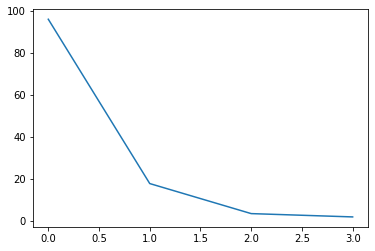

In [8]:
# 特異値の大きさを確認
plt.plot(s)

## 行列Uのk=3までを採用（=次元削減）

In [9]:
k = 3
new_x = U[:, :k]
print(new_x.shape)
print(new_x[0])
print(X[0])

(150, 3)
[-0.06161685  0.12961144  0.0021386 ]
[5.1 3.5 1.4 0.2]


## 比較対象用の主成分分析による次元削減

In [10]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
new_x2 = pca.transform(X)
print(new_x2.shape)
print(new_x2[0])

(150, 3)
[-2.68412563  0.31939725 -0.02791483]


## 分類学習の結果

In [11]:
scores = []
dataset = {"original":X, "SVD(k=3)":new_x, "PCA(n=3)":new_x2}
for label, data in dataset.items():
  clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear',
                                        tol=1e-6, max_iter=int(1e6),
                                        warm_start=True,
                                        intercept_scaling=10000.)
  clf.fit(data, y)
  scores.append({label:clf.score(data, y)})

print(scores)


[{'original': 0.9533333333333334}, {'SVD(k=3)': 0.8733333333333333}, {'PCA(n=3)': 0.9666666666666667}]
